# SCIALOG Statistical Analyses

Steps 1 - 3

(also, clean up the ipynb when necessary)

In [5]:
# going to just force the working directory to the NICO_human_gemini folder
import os
os.chdir("/Users/maxchalekson/NICO-Research/NICO_human-gemini")


In [7]:
import os
print("Working directory:", os.getcwd())


Working directory: /Users/maxchalekson/NICO-Research/NICO_human-gemini



Max annotation counts:
annotation
expand on existing idea              49
ask clarifying question              24
present new idea                     21
explain or define term or concept    17
provide supporting evidence          12
NA (please provide explanation)      12
propose decision                     10
express agreement                     9
encourage particpatioin               7
offer constructive criticism          7
express enthusiasm                    5
acknowledge contribution              5
express frustation                    4
assign task                           3
express humor                         3
reject idea                           1
express alternative decision          1
Name: count, dtype: int64
count    17.000000
mean     11.176471
std      11.822834
min       1.000000
25%       4.000000
50%       7.000000
75%      12.000000
max      49.000000
Name: count, dtype: float64

Evey annotation counts:
annotation
expand on existing idea              51
exp

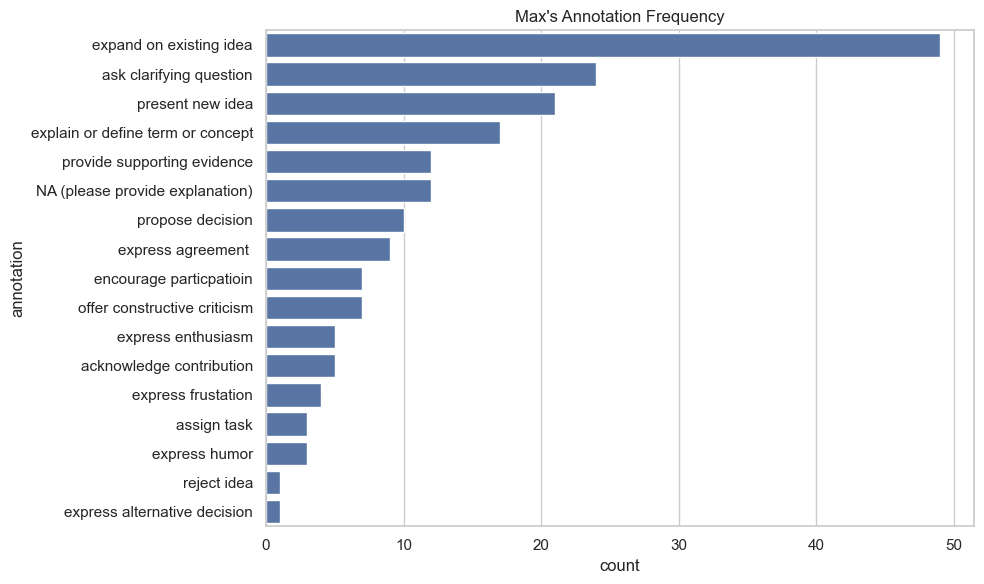

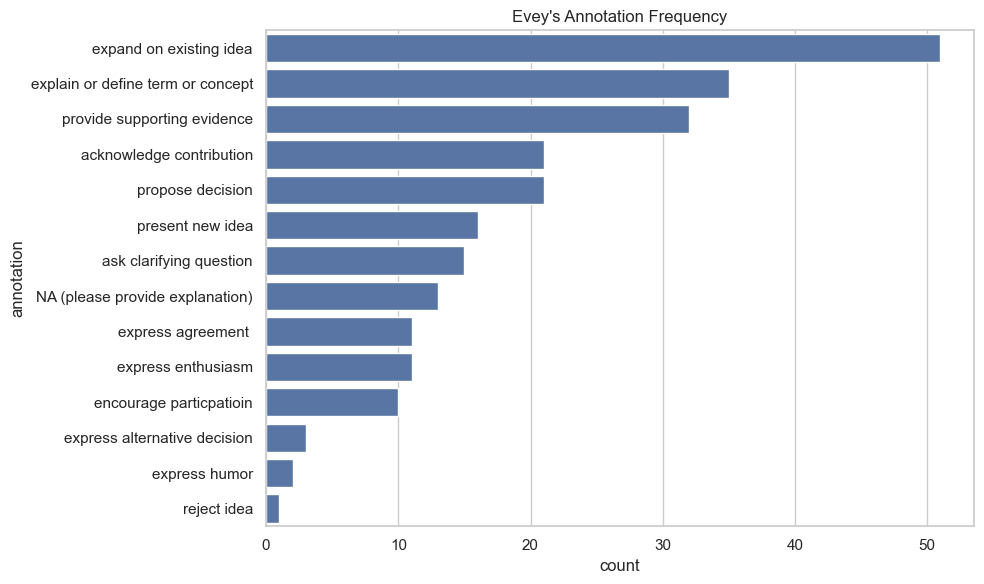


Cohen's Kappa (overall): 0.095

Cohen's Kappa per code (1=present, 0=absent):
NA (please provide explanation)    : 0.207
acknowledge contribution           : 0.092
ask clarifying question            : 0.160
assign task                        : 0.000
encourage particpatioin            : 0.160
expand on existing idea            : 0.043
explain or define term or concept  : 0.114
express agreement                  : 0.224
express alternative decision       : -0.004
express enthusiasm                 : -0.026
express frustation                 : 0.000
express humor                      : 0.191
offer constructive criticism       : 0.000
present new idea                   : -0.027
propose decision                   : 0.143
provide supporting evidence        : 0.120
reject idea                        : -0.004


In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# Helper: Flatten one coder's Excel workbook - (STEPS 1-2 -- HUMAN CODERS)
# --------------------
def process_flat_sheet(filepath, coder_name):
    xls = pd.read_excel(filepath, sheet_name=None)
    all_dfs = []

    for sheet_name, df in xls.items():
        df.columns = [str(c).strip().lower() for c in df.columns]
        if not {'video', 'timestamp', 'speaker'}.issubset(df.columns):
            continue
        for i in range(4):  # 4 annotation columns
            annot_idx = 3 + i * 2  # D, F, H, J (annotation cols)
            if annot_idx >= len(df.columns):
                continue
            code_col = df.columns[annot_idx]
            temp = df[['video', 'timestamp', 'speaker', code_col]].copy()
            temp.columns = ['video', 'timestamp', 'speaker', 'annotation']
            temp['coder'] = coder_name
            temp['sheet'] = sheet_name
            all_dfs.append(temp.dropna(subset=['annotation']))
    return pd.concat(all_dfs, ignore_index=True)

# --------------------
# Load and prepare data
# --------------------
df_max = process_flat_sheet("Data/sampled video verification (Max).xlsx", "max")
df_evey = process_flat_sheet("Data/sampled video verification (Evey).xlsx", "evey")

# --------------------
# Summary stats per coder
# --------------------
for df, name in [(df_max, "Max"), (df_evey, "Evey")]:
    print(f"\n{name} annotation counts:")
    print(df['annotation'].value_counts())
    print(df['annotation'].value_counts().describe())

# --------------------
# Frequency plot per coder
# --------------------
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_max, y='annotation', order=df_max['annotation'].value_counts().index)
plt.title("Max's Annotation Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_evey, y='annotation', order=df_evey['annotation'].value_counts().index)
plt.title("Evey's Annotation Frequency")
plt.tight_layout()
plt.show()

# --------------------
# Merge & compute Cohen's Kappa (overall and per-code binary)
# --------------------
df_compare = df_max.merge(df_evey, on=["video", "timestamp"], suffixes=('_max', '_evey'))

# Overall kappa
kappa = cohen_kappa_score(df_compare['annotation_max'], df_compare['annotation_evey'])
print(f"\nCohen's Kappa (overall): {kappa:.3f}")

# Kappa per individual code (binarized)
unique_codes = set(df_compare['annotation_max']).union(set(df_compare['annotation_evey']))
print("\nCohen's Kappa per code (1=present, 0=absent):")
for code in sorted(unique_codes):
    max_binary = df_compare['annotation_max'].apply(lambda x: 1 if x == code else 0)
    evey_binary = df_compare['annotation_evey'].apply(lambda x: 1 if x == code else 0)
    score = cohen_kappa_score(max_binary, evey_binary, weights="quadratic")
    print(f"{code:<35}: {score:.3f}")


Also to include (potentially) these plotsto help with my own questioning:

Heatmap, Cohen’s Kappa Score Table (Quadratic Weighted), Confusion matrix